In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Load the npy file
data = np.load(r"E:\joints\003\IzvOYVMltkI.mp4\0114.npy")

frames = data[:, 0].astype(int)
person_ids = data[:, 1].astype(int)
joint_coords = data[:, 2:].reshape(len(data), 18, 3)  # Reshape to separate x, y, confidence

# Define COCO joints in order
coco_joints = {
    0: "Nose", 1: "Neck", 2: "RShoulder", 3: "RElbow", 4: "RWrist", 
    5: "LShoulder", 6: "LElbow", 7: "LWrist", 8: "RHip", 9: "RKnee", 
    10: "RAnkle", 11: "LHip", 12: "LKnee", 13: "LAnkle", 
    14: "REye", 15: "LEye", 16: "REar", 17: "LEar"
}

# Plotting frames for person_id = 4 only
plt.figure(figsize=(8, 6))

for i in range(len(frames)):
    if person_ids[i] == 0:
        plt.clf()  # Clear the current figure
        plt.title(f'Frame {frames[i]}')
        plt.xlim(0, 640)
        plt.ylim(360, 0)  # Invert y-axis to match image coordinates

        for joint_num in range(18):
            x = joint_coords[i, joint_num, 0]
            y = joint_coords[i, joint_num, 1]
            plt.scatter(x, y, color='red')
            plt.text(x, y, coco_joints[joint_num], fontsize=9, color='black')

        plt.gca().invert_yaxis()  # Invert y-axis to match image coordinates
        plt.pause(0.001)  # Pause for a short time to create an animation effect

plt.show()


In [20]:
import numpy as np

# Load the existing .npy file
file_path = r"D:\BoLD\BOLD_public\joints\003\IzvOYVMltkI.mp4\0114.npy"
data = np.load(file_path)

# Assuming data has shape (N, 2) where N is the number of rows
# Extract the second column (person IDs)
person_ids = data[:, 1]

# Find indices where person ID is "0"
indices_to_keep = np.where(person_ids == 4)[0]

# Filter the data array based on the indices
filtered_data = data[indices_to_keep]

# Save the filtered data back to a .npy file
new_file_path = 'updated_file.npy'
np.save(new_file_path, filtered_data)

print(f"Filtered data saved to {new_file_path}")


Filtered data saved to updated_file.npy


In [10]:
import numpy as np
import cv2
import os

# Load npy file
npy_file_path = r"E:\crop\updated_file.npy"
data = np.load(npy_file_path)

# Extract necessary data from npy file
frames = data[:, 0].astype(float)  # assuming frame number is in the first column
joint_coords = data[:, 2:].reshape(-1, 18, 3)  # extracting joint coordinates

# Assuming you have 53 frames to crop
num_frames_to_crop = min(len(frames), 53)

# Loop over the frames and create a single cropped image per frame
for i in range(num_frames_to_crop):
    frame_number = frames[i]
    joints = joint_coords[i]

    # Example: Load an image (adjust as per your image loading method)
    image_path = f'E:\\crop\\weww\\{frame_number}.jpg'
    image = cv2.imread(image_path)

    if image is None:
        print(f"Could not load image: {image_path}")
        continue

    # Determine the bounding box for all joints
    min_x = min(joints[:, 0])
    min_y = min(joints[:, 1])
    max_x = max(joints[:, 0])
    max_y = max(joints[:, 1])

    # Calculate crop region
    top_left_x = int(min_x)
    top_left_y = int(min_y)
    bottom_right_x = int(max_x)
    bottom_right_y = int(max_y)

    # Ensure coordinates are within image bounds
    top_left_x = max(top_left_x, 0)
    top_left_y = max(top_left_y, 0)
    bottom_right_x = min(bottom_right_x, image.shape[1])
    bottom_right_y = min(bottom_right_y, image.shape[0])

    # Crop image
    cropped_image = image[top_left_y:bottom_right_y, top_left_x:bottom_right_x]

    # Save cropped image to a folder
    save_folder = r"E:\crop\cropp"
    if not os.path.exists(save_folder):
        os.makedirs(save_folder)

    output_path = os.path.join(save_folder, f'cropped_frame_{frame_number}.jpg')
    cv2.imwrite(output_path, cropped_image)

    print(f"Cropped and saved frame {frame_number}")

print("Cropping complete.")


Cropped and saved frame 26122.0
Cropped and saved frame 26123.0
Cropped and saved frame 26124.0
Cropped and saved frame 26125.0
Cropped and saved frame 26126.0
Cropped and saved frame 26127.0
Cropped and saved frame 26128.0
Cropped and saved frame 26129.0
Cropped and saved frame 26130.0
Cropped and saved frame 26131.0
Cropped and saved frame 26132.0
Cropped and saved frame 26133.0
Cropped and saved frame 26134.0
Cropped and saved frame 26135.0
Cropped and saved frame 26136.0
Cropped and saved frame 26137.0
Cropped and saved frame 26138.0
Cropped and saved frame 26139.0
Cropped and saved frame 26140.0
Cropped and saved frame 26141.0
Cropped and saved frame 26142.0
Cropped and saved frame 26143.0
Cropped and saved frame 26144.0
Cropped and saved frame 26145.0
Cropped and saved frame 26146.0
Cropped and saved frame 26147.0
Cropped and saved frame 26148.0
Cropped and saved frame 26149.0
Cropped and saved frame 26150.0
Cropped and saved frame 26151.0
Cropped and saved frame 26152.0
Cropped 

In [7]:
import os
import re

# Define the directory containing the images
directory = r"E:\crop\weww"

# Define the pattern to match for renaming
pattern = r'frame_(\d+)'

# Define the new naming convention
new_base = 26122

# Function to rename files
def rename_files(directory, pattern, new_base):
    # Get list of files in the directory
    files = os.listdir(directory)
    
    for filename in files:
        # Match the pattern in the filename
        match = re.search(pattern, filename)
        
        if match:
            # Extract the number from the filename
            num = int(match.group(1))
            
            # Calculate the new number based on the offset
            new_num = new_base + (num - 30)
            
            # Construct the new filename
            new_filename = re.sub(pattern, str(new_num), filename)
            
            # Rename the file
            os.rename(os.path.join(directory, filename), os.path.join(directory, new_filename))
            print(f'Renamed {filename} to {new_filename}')

# Call the function to rename files
rename_files(directory, pattern, new_base)


Renamed frame_20.jpg to 26112.jpg
Renamed frame_21.jpg to 26113.jpg
Renamed frame_22.jpg to 26114.jpg
Renamed frame_23.jpg to 26115.jpg
Renamed frame_24.jpg to 26116.jpg
Renamed frame_25.jpg to 26117.jpg
Renamed frame_26.jpg to 26118.jpg
Renamed frame_27.jpg to 26119.jpg
Renamed frame_28.jpg to 26120.jpg
Renamed frame_29.jpg to 26121.jpg
Renamed frame_30.jpg to 26122.jpg
Renamed frame_31.jpg to 26123.jpg
Renamed frame_32.jpg to 26124.jpg
Renamed frame_33.jpg to 26125.jpg
Renamed frame_34.jpg to 26126.jpg
Renamed frame_35.jpg to 26127.jpg
Renamed frame_36.jpg to 26128.jpg
Renamed frame_37.jpg to 26129.jpg
Renamed frame_38.jpg to 26130.jpg
Renamed frame_39.jpg to 26131.jpg
Renamed frame_40.jpg to 26132.jpg
Renamed frame_41.jpg to 26133.jpg
Renamed frame_42.jpg to 26134.jpg
Renamed frame_43.jpg to 26135.jpg
Renamed frame_44.jpg to 26136.jpg
Renamed frame_45.jpg to 26137.jpg
Renamed frame_46.jpg to 26138.jpg
Renamed frame_47.jpg to 26139.jpg
Renamed frame_48.jpg to 26140.jpg
Renamed frame_

In [7]:
import os
import numpy as np

def rename_images(image_folder, npy_file):
    # Load the numpy file
    names = np.load(npy_file)
    
    # Check if the numpy file contains the right data
    if len(names.shape) != 2 or names.shape[1] < 1:
        raise ValueError("The numpy file should have at least two dimensions and the first dimension should contain the new names.")
    
    # Get the first column from the numpy array
    new_names = names[:, 0]
    
    # Get the list of images in the folder
    images = sorted([img for img in os.listdir(image_folder) if img.lower().endswith(('png', 'jpg', 'jpeg', 'bmp', 'gif'))])
    
    # Ensure there are enough new names for the images
    if len(new_names) < len(images):
        raise ValueError("Not enough names in the numpy file to rename all images.")

    # Rename each image
    for i, image in enumerate(images):
        old_image_path = os.path.join(image_folder, image)
        new_image_name = str(new_names[i]) + os.path.splitext(image)[1]  # Keep the original file extension
        new_image_path = os.path.join(image_folder, new_image_name)
        
        os.rename(old_image_path, new_image_path)
        print(f"Renamed {old_image_path} to {new_image_path}")

# Example usage:
image_folder = r"E:\crop\video_1"
npy_file = r"E:\crop\updated_file.npy"
rename_images(image_folder, npy_file)


Renamed E:\crop\video_1\frame_20.jpg to E:\crop\video_1\26122.0.jpg
Renamed E:\crop\video_1\frame_21.jpg to E:\crop\video_1\26123.0.jpg
Renamed E:\crop\video_1\frame_22.jpg to E:\crop\video_1\26124.0.jpg
Renamed E:\crop\video_1\frame_23.jpg to E:\crop\video_1\26125.0.jpg
Renamed E:\crop\video_1\frame_24.jpg to E:\crop\video_1\26126.0.jpg
Renamed E:\crop\video_1\frame_25.jpg to E:\crop\video_1\26127.0.jpg
Renamed E:\crop\video_1\frame_26.jpg to E:\crop\video_1\26128.0.jpg
Renamed E:\crop\video_1\frame_27.jpg to E:\crop\video_1\26129.0.jpg
Renamed E:\crop\video_1\frame_28.jpg to E:\crop\video_1\26130.0.jpg
Renamed E:\crop\video_1\frame_29.jpg to E:\crop\video_1\26131.0.jpg
Renamed E:\crop\video_1\frame_30.jpg to E:\crop\video_1\26132.0.jpg
Renamed E:\crop\video_1\frame_31.jpg to E:\crop\video_1\26133.0.jpg
Renamed E:\crop\video_1\frame_32.jpg to E:\crop\video_1\26134.0.jpg
Renamed E:\crop\video_1\frame_33.jpg to E:\crop\video_1\26135.0.jpg
Renamed E:\crop\video_1\frame_34.jpg to E:\crop\

In [ ]:
import numpy as np
import pandas as pd
import os

# Path to the CSV file
csv_file_path = r"E:\annotation_train_joints.csv"

# Folder to save the updated npy files
output_folder = r"E:\testt"

# Ensure the output directory exists
os.makedirs(output_folder, exist_ok=True)

# Read the CSV file
df = pd.read_csv(csv_file_path)  # Assuming there is no header

# Iterate over each row in the DataFrame
for index, row in df.iterrows():
    npy_file_path = row[0]
    person_id = row[1]
    
    # Load the .npy file
    data = np.load(npy_file_path)
    
    # Filter based on person_id in the second column (index 1)
    filtered_data = data[data[:, 1] == person_id]
    
    # Get the filename from the path
    filename = os.path.basename(npy_file_path)
    
    # Save the updated .npy file in the output folder
    output_path = os.path.join(output_folder, filename)
    np.save(output_path, filtered_data)

print("All files have been processed and saved.")


In [2]:
import numpy as np
import pandas as pd
import os

def filter_npy_files(csv_file):
    # Load the CSV file into a DataFrame
    df = pd.read_csv(csv_file)

    for index, row in df.iterrows():
        # Extract the path and person ID from the CSV
        file_path = row[0]
        target_person_id = row[1]

        # Check if the file exists
        if not os.path.exists(file_path):
            print(f"File not found: {file_path}")
            continue
        
        try:
            # Load the .npy file
            data = np.load(file_path)
        except Exception as e:
            print(f"Error loading file {file_path}: {e}")
            continue

        # Check if the file has the correct dimensions
        if data.ndim != 2 or data.shape[1] != 56:
            print(f"Unexpected data shape in file: {file_path}")
            continue

        # Filter the data based on personid
        filtered_data = data[data[:, 1] == target_person_id]
        
        # Check if filtering results in empty data
        if filtered_data.size == 0:
            print(f"No matching data for personid {target_person_id} in file: {file_path}")
            continue
        
        try:
            # Save the filtered data back to the same file
            np.save(file_path, filtered_data)
            print(f"Updated file saved: {file_path}")
        except Exception as e:
            print(f"Error saving file {file_path}: {e}")

# Example usage
csv_file = r"E:\annotation_train_joints.csv"  # Path to your CSV file
filter_npy_files(csv_file)


C:\Users\John Christopher\AppData\Local\Temp\ipykernel_13012\4123292805.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  file_path = row[0]
C:\Users\John Christopher\AppData\Local\Temp\ipykernel_13012\4123292805.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  target_person_id = row[1]


Updated file saved: D:/BoLD/BOLD_public/joints/003/IzvOYVMltkI.mp4/0114.npy
Updated file saved: D:/BoLD/BOLD_public/joints/003/y7ncweROe9U.mp4/0130.npy
No matching data for personid 1 in file: D:/BoLD/BOLD_public/joints/003/y7ncweROe9U.mp4/0130.npy
Updated file saved: D:/BoLD/BOLD_public/joints/003/IKdBLciu_-A.mp4/0015.npy
Updated file saved: D:/BoLD/BOLD_public/joints/003/8VZEwOCQ8bc.mp4/0476.npy
Updated file saved: D:/BoLD/BOLD_public/joints/003/Ma2hgTmveKQ.mp4/0111.npy
Updated file saved: D:/BoLD/BOLD_public/joints/003/phrYEKv0rmw.mp4/0010.npy
Updated file saved: D:/BoLD/BOLD_public/joints/003/_7oWZq_s_Sk.mp4/0820.npy
Updated file saved: D:/BoLD/BOLD_public/joints/003/Db19rWN5BGo.mp4/0388.npy
Updated file saved: D:/BoLD/BOLD_public/joints/003/Ekwy7wzLfjc.mp4/0181.npy
Updated file saved: D:/BoLD/BOLD_public/joints/003/sADELCyj10I.mp4/0380.npy
No matching data for personid 2 in file: D:/BoLD/BOLD_public/joints/003/sADELCyj10I.mp4/0380.npy
No matching data for personid 3 in file: D:/Bo

In [4]:
import numpy as np
import pandas as pd

# Load the .npy file
array = np.load(r"D:\BoLD\BOLD_public\joints\003\IKdBLciu_-A.mp4\0015.npy")

# Convert to a DataFrame
df = pd.DataFrame(array)

# Save the DataFrame to a CSV file
df.to_csv('data2.csv', index=False, header=False)  # Set index=True and add header if needed


In [3]:
import pandas as pd
import os

# Load the CSV file
file_path = r"E:\annotation_train_2.0.csv"
data = pd.read_csv(file_path)

# Function to modify the third part of the "Video Path"
def modify_path(video_path, emotion_value):
    parts = video_path.split('/')
    parts[2] = emotion_value  # Replace the third part with the current emotion value
    return '/'.join(parts)

# Function to check if the last part of the path is accessible
def check_directories(data):
    results = []
    for index, row in data.iterrows():
        original_path = row['Video Path']
        emotion_values = row['Emotion Value'].split(', ')
        video_folder = os.path.basename(original_path)  # Get the last part of the path (e.g., video_0)
        
        for emotion_value in emotion_values:
            try:
                modified_path = modify_path(original_path, emotion_value)
                last_part_path = modified_path  # Check the full modified path
                # Here, we simulate checking the path's existence
                if os.path.exists(last_part_path):  # In actual use, replace with the real check
                    results.append(f"Directory '{last_part_path}' is accessible.")
                else:
                    results.append(f"Error: Directory '{last_part_path}' is not accessible.")
            except Exception as e:
                results.append(f"Error processing emotion '{emotion_value}' for row {index}: {e}")
    return results

# Get and print the results
results = check_directories(data)
for result in results:
    print(result)



# Access extracted frame images folders....


Directory 'E:/emotion_value/Anticipation/video_0' is accessible.
Directory 'E:/emotion_value/Happiness/video_0' is accessible.
Directory 'E:/emotion_value/Pleasure/video_0' is accessible.
Directory 'E:/emotion_value/Excitement/video_0' is accessible.
Directory 'E:/emotion_value/Excitement/video_1' is accessible.
Directory 'E:/emotion_value/Aversion/video_1' is accessible.
Directory 'E:/emotion_value/Annoyance/video_1' is accessible.
Directory 'E:/emotion_value/Anger/video_1' is accessible.
Directory 'E:/emotion_value/Disapproval/video_2' is accessible.
Directory 'E:/emotion_value/Aversion/video_3' is accessible.
Directory 'E:/emotion_value/Aversion/video_4' is accessible.
Directory 'E:/emotion_value/Fear/video_4' is accessible.
Directory 'E:/emotion_value/Happiness/video_5' is accessible.
Directory 'E:/emotion_value/Fatigue/video_6' is accessible.
Directory 'E:/emotion_value/Anticipation/video_7' is accessible.
Directory 'E:/emotion_value/Engagement/video_8' is accessible.
Directory 'E

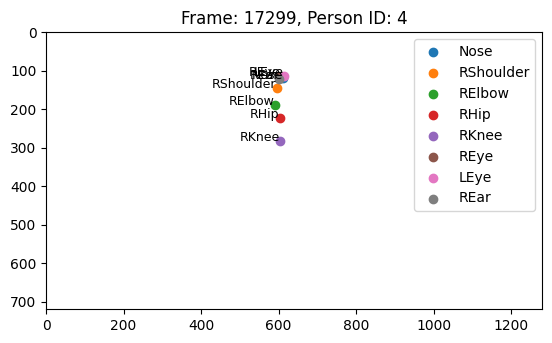

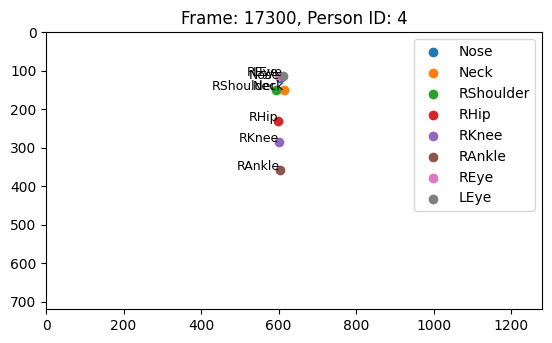

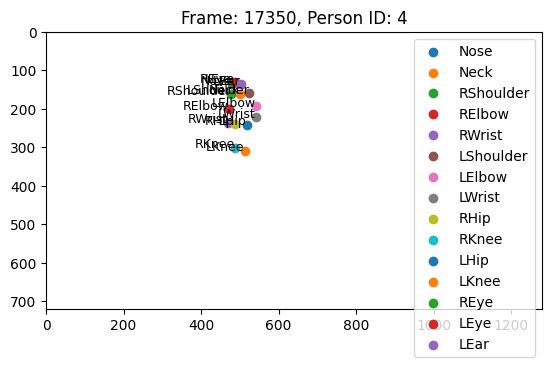

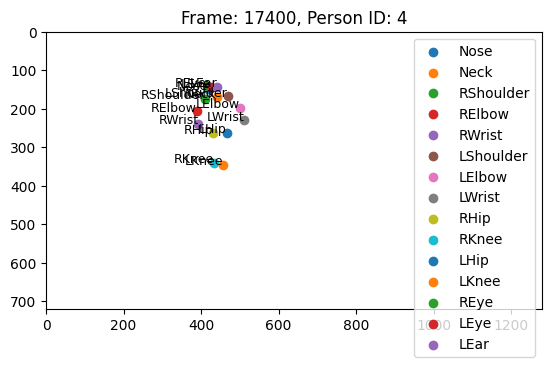

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def visualize_frame(file_path, frame_index, person_id=None):
    # Load the data from the provided npy file
    data = np.load(file_path)

    # Define the COCO parts
    coco_parts = [
        "Nose", "Neck", "RShoulder", "RElbow", "RWrist",
        "LShoulder", "LElbow", "LWrist", "RHip", "RKnee",
        "RAnkle", "LHip", "LKnee", "LAnkle", "REye", "LEye",
        "REar", "LEar"
    ]

    # Extract frame number, person id and pose data
    frame_numbers = data[:, 0]
    person_ids = data[:, 1]
    pose_data = data[:, 2:]

    # Filter data for the specified frame
    frame_data = data[frame_numbers == frame_index]

    if person_id is not None:
        frame_data = frame_data[frame_data[:, 1] == person_id]

    if len(frame_data) == 0:
        print(f"No data available for frame {frame_index} and person {person_id}")
        return

    # Extract pose data for the first matching entry
    pose = frame_data[0, 2:].reshape(-1, 3)

    # Plot the pose
    plt.figure(figsize=(6.4, 3.6))  # Set the size to 640x360 pixels
    for i, (x, y, confidence) in enumerate(pose):
        if confidence > 0.5:  # Only plot joints with a confidence score > 0.5
            plt.scatter(x, y, label=coco_parts[i])
            plt.text(x, y, coco_parts[i], fontsize=9, ha='right')

    plt.xlim(0, 1280)  # Assuming a typical video resolution
    plt.ylim(720, 0)
    plt.title(f"Frame: {frame_index}, Person ID: {person_id if person_id is not None else 'Any'}")
    plt.legend()
    plt.show()

# Example usage: visualize specific frames within the available range
file_path = r"D:\BoLD\BOLD_public\joints\003\IzvOYVMltkI.mp4\0114.npy"

visualize_frame(file_path, frame_index=17299, person_id=4)
visualize_frame(file_path, frame_index=17300, person_id=4)
visualize_frame(file_path, frame_index=17350, person_id=4)
visualize_frame(file_path, frame_index=17400, person_id=4)

# Visualize updated npy files....